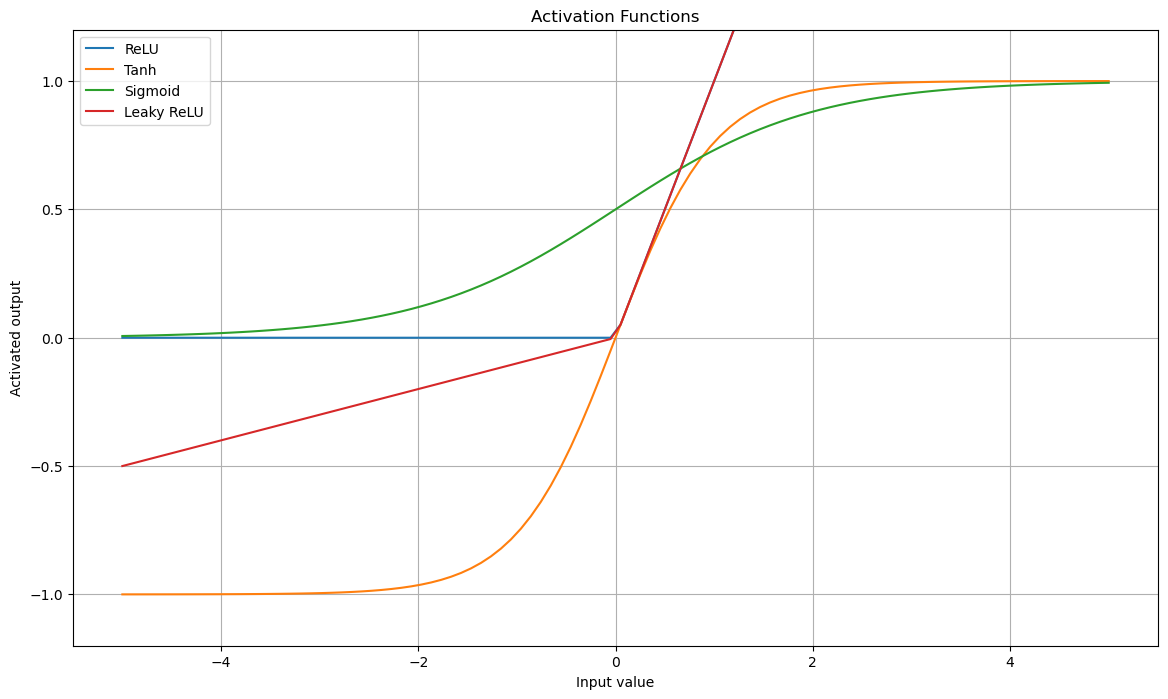

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, x * alpha)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Generating data for plots
x = np.linspace(-5, 5, 100)
functions = [relu, tanh, sigmoid, leaky_relu]
names = ['ReLU', 'Tanh', 'Sigmoid', 'Leaky ReLU']

# Plotting
plt.figure(figsize=(14, 8))
for func, name in zip(functions, names):
    plt.plot(x, func(x), label=name)

# Softmax is a bit different, it's typically used in the output layer for classification
# For simplicity, we won't include it in this comparative plot

plt.title('Activation Functions')
plt.xlabel('Input value')
plt.ylabel('Activated output')
plt.ylim(-1.2,1.2)
plt.legend()
plt.grid(True)
plt.savefig('Ch7ActivationFn2.png')
plt.show()

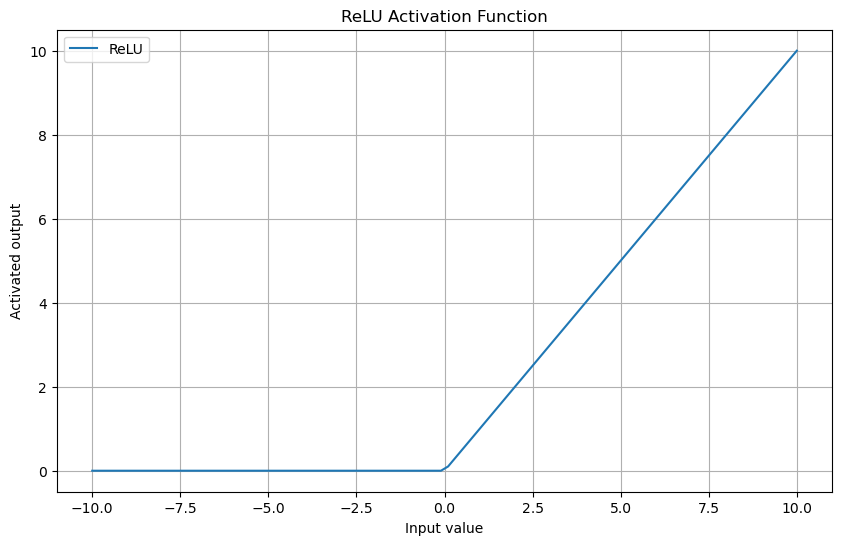

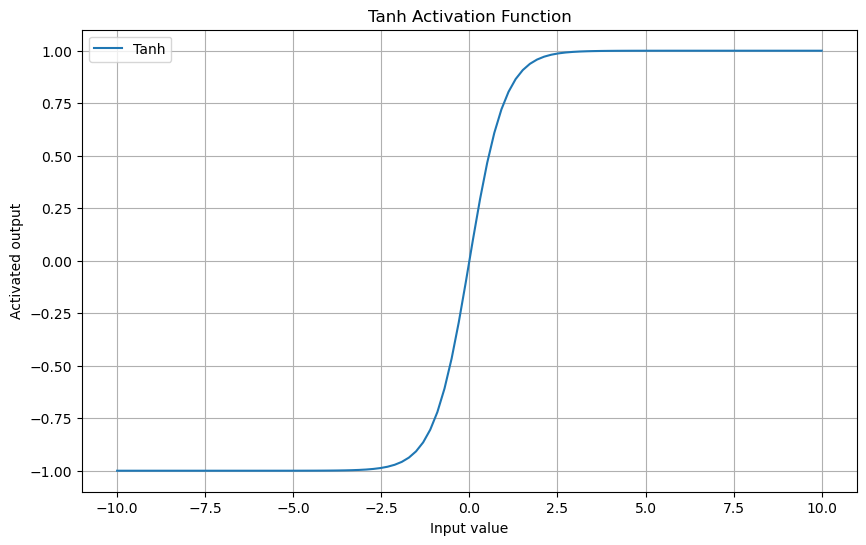

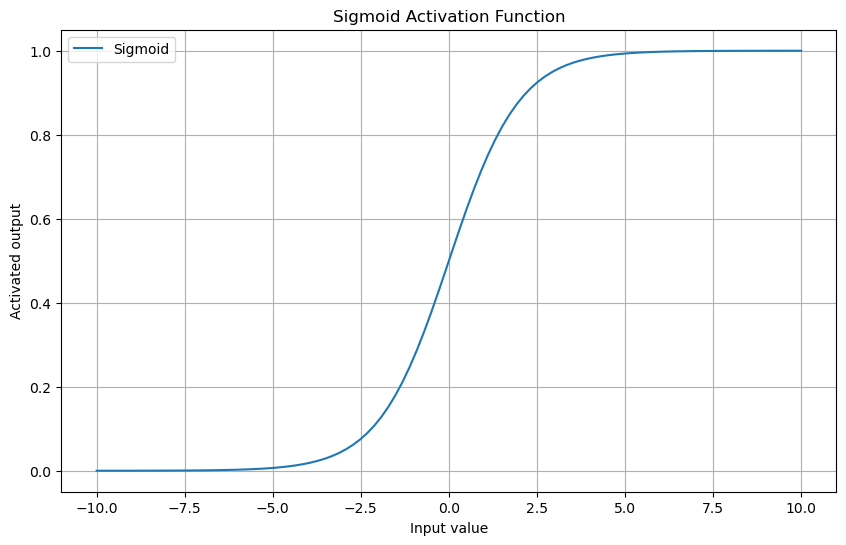

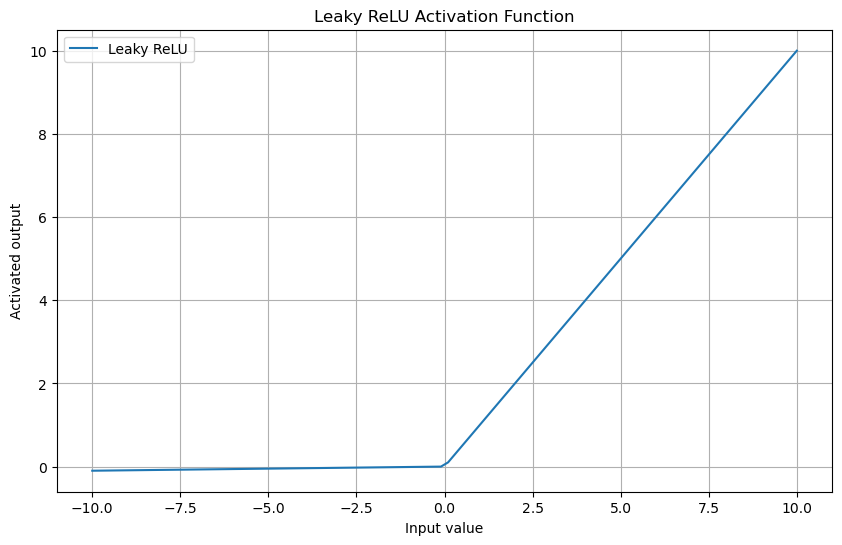

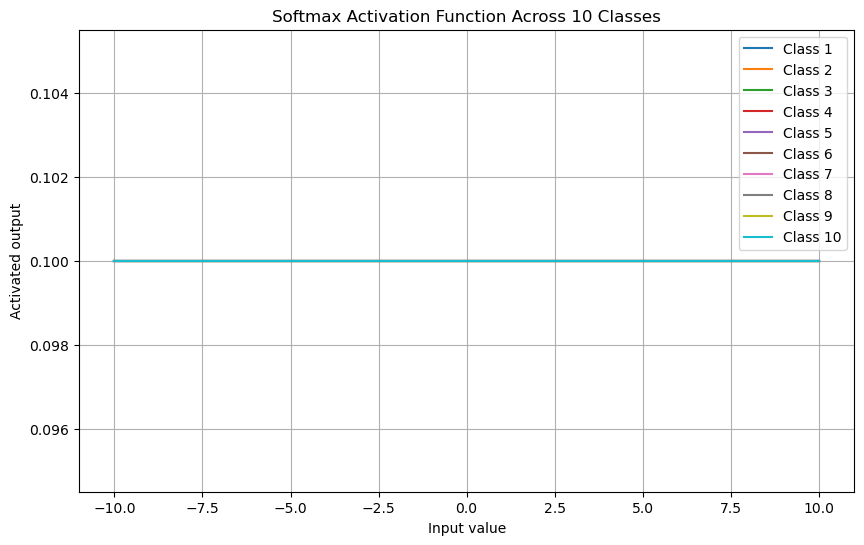

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x, axis=0)

# Input values for our plots
x = np.linspace(-10, 10, 100)

# Functions and their names for plotting
functions = [relu, tanh, sigmoid, leaky_relu, softmax]
function_names = ['ReLU', 'Tanh', 'Sigmoid', 'Leaky ReLU', 'Softmax']

# Create separate plots for each activation function
for func, name in zip(functions, function_names):
    plt.figure(figsize=(10, 6))
    if name == 'Softmax':
        # For softmax, we need a bit different handling due to its nature (sum of outputs = 1)
        # Let's simulate a scenario for softmax function with 10 classes
        y = func(np.vstack([x for _ in range(10)]))
        for i in range(10):
            plt.plot(x, y[i], label=f'Class {i+1}')
        plt.title(f'{name} Activation Function Across 10 Classes')
    else:
        y = func(x)
        plt.plot(x, y, label=name)
        plt.title(f'{name} Activation Function')
    
    plt.xlabel('Input value')
    plt.ylabel('Activated output')
    plt.legend()
    plt.grid(True)
    plt.show()

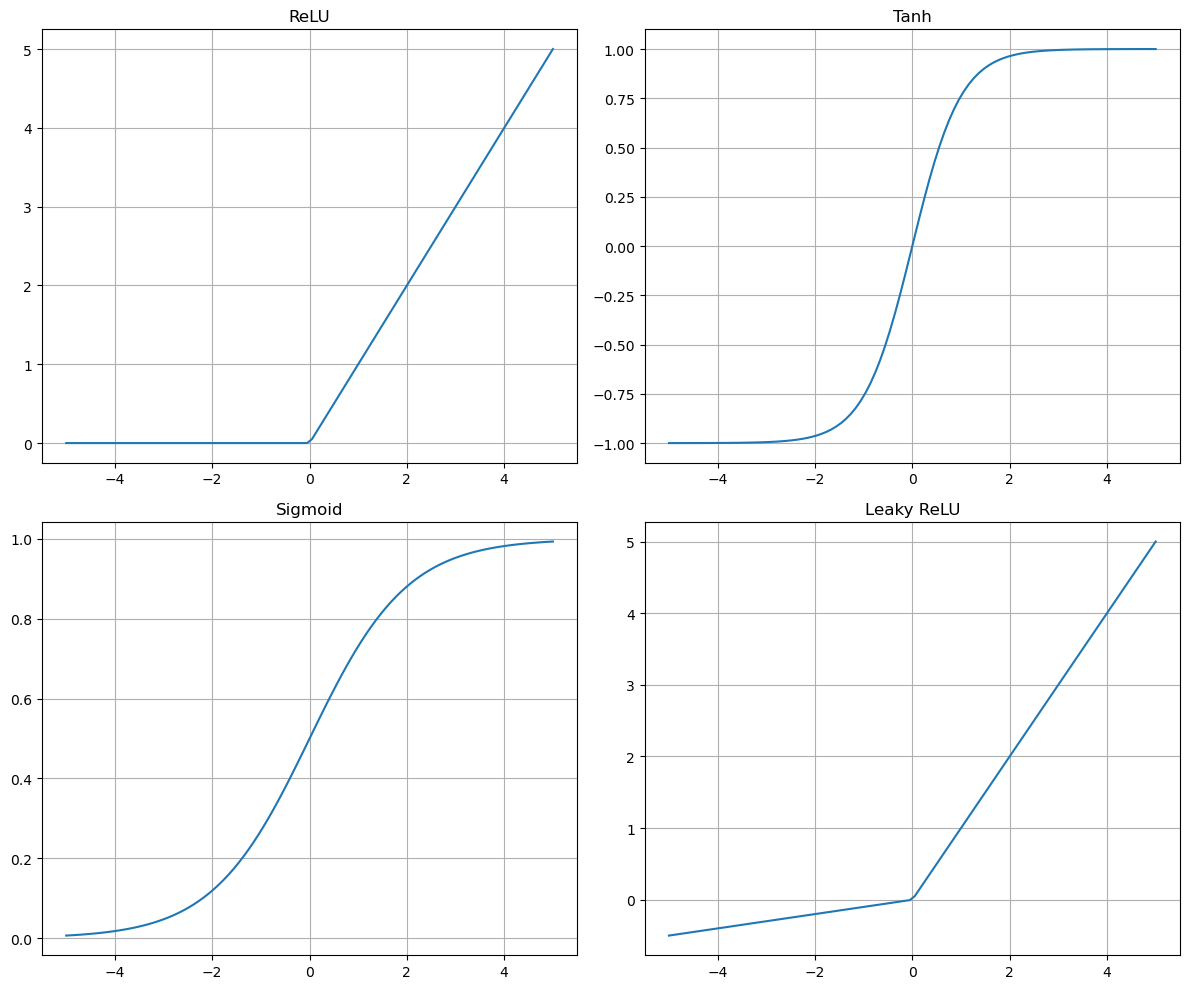

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, x * alpha)

# Input values for our plots
x = np.linspace(-5, 5, 100)

# Setup for 2x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
functions = [relu, tanh, sigmoid, leaky_relu]
titles = ['ReLU', 'Tanh', 'Sigmoid', 'Leaky ReLU']

# Plot each activation function in its subplot
for ax, func, title in zip(axes.flatten(), functions, titles):
    y = func(x)
    ax.plot(x, y)
    ax.set_title(title)
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('Ch7ActivationFns1.png')
plt.show()

In [4]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
# Import KerasClassifier from scikeras
from scikeras.wrappers import KerasClassifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load and preprocess the MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X.reshape(-1, 28*28).astype('float32') / 255.0
test_X = test_X.reshape(-1, 28*28).astype('float32') / 255.0

In [ ]:
# Define the model creation function with L2 regularization and dropout
def create_model(learning_rate=0.01, dropout_rate=0.0, l2_rate=0.0):
    model = Sequential([
        Flatten(input_shape=(784,)),
        Dense(128, activation='relu', kernel_regularizer=l2(l2_rate)),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(model=create_model, epochs=10, verbose=0)

# Define the grid search parameters
param_grid = {
    'model__learning_rate': [0.001, 0.01],
    'model__dropout_rate': [0.0, 0.5],
    'model__l2_rate': [0.0, 0.01]
}

# Perform 5-fold cross-validation and grid search
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, return_train_score=True)
grid_result = grid.fit(train_X, train_y)

# Summarize the best results
print(f"Best: {grid_result.best_score_:.4f} using {grid_result.best_params_}")

# Visualization of performance
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2), len(grid_param_1))
    
    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2), len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1, figsize=(15, 6))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
    
    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
plot_grid_search(grid_result.cv_results_, param_grid['model__learning_rate'], param_grid['model__dropout_rate'], 'Learning Rate', 'Dropout Rate')

# Additional plots can be generated similarly for 'model__l2_rate' and other parameters
